## Winpython with R : comparing DPLYR and Pandas


It is based on the Thomas Augspurger comparison [Notebook](
http://nbviewer.ipython.org/urls/gist.githubusercontent.com/TomAugspurger/6e052140eaa5fdb6e8c0/raw/674f99243eec162e17499eb0e2e0ee881e17b960/dplyr_pandas.ipynb)

This is  the [introductory dplyr vignette](http://cran.r-project.org/web/packages/dplyr/vignettes/introduction.html) to analyze some flight data, played via an Ipython/Jupyter notebook.

We just play the "R" code part, this time 

Nota: Hadley Wickham would recommand you to add more package to the list: caret, reader, shiny

https://gist.github.com/hadley/820f09ded347c62c2864

##### Transform this Markdown cell to a Code cell, if ever you need to re-feed a basic R environnement

%R install.packages("tidyr")

%R install.packages("dplyr") 

%R install.packages("ggplot2")

%R install.packages("rvest")

%R install.packages('RSQLite') 

%R install.packages("zoo") 

%R install.packages("forecast") 

%R install.packages('R.utils')

%R install.packages("nycflights13")

%R install.packages('hflights')

%R update.packages()

In [1]:
library("dplyr") # for functions
library("nycflights13")
write.csv(flights, "flights.csv")


Attaching package: 'dplyr'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Data: nycflights13

In [2]:
dim(flights)

[1] 336776     16

In [3]:
head(flights)

Source: local data frame [6 x 16]

  year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1 2013     1   1      517         2      830        11      UA  N14228   1545
2 2013     1   1      533         4      850        20      UA  N24211   1714
3 2013     1   1      542         2      923        33      AA  N619AA   1141
4 2013     1   1      544        -1     1004       -18      B6  N804JB    725
5 2013     1   1      554        -6      812       -25      DL  N668DN    461
6 2013     1   1      554        -4      740        12      UA  N39463   1696
Variables not shown: origin (chr), dest (chr), air_time (dbl), distance (dbl),
  hour (dbl), minute (dbl)

# Single table verbs

``dplyr`` has a small set of nicely defined verbs. I've listed their closest pandas verbs.


<table>
  <tr>
    <td><b>dplyr</b></td>
    <td><b>pandas</b></td>
  </tr>
  <tr>
    <td>filter() (and slice())</td>
    <td>query() (and loc[], iloc[])</td>
  </tr>
  <tr>
    <td>arrange()</td>
    <td>sort()</td>
  </tr>
  <tr>
  <td>select() (and rename())</td>
    <td>\_\_getitem\_\_ (and rename())</td>
  </tr>
  <tr>
  <td>distinct()</td>
    <td>drop_duplicates()</td>
  </tr>
  <tr>
    <td>mutate() (and transmute())</td>
    <td>None</td>
  </tr>
  <tr>
    <td>summarise()</td>
    <td>None</td>
  </tr>
  <tr>
    <td>sample_n() and sample_frac()</td>
    <td>None</td>
  </tr>
</table>


Some of the "missing" verbs in pandas are because there are other, different ways of achieving the same goal. For example `summarise` is spread across `mean`, `std`, etc. Others, like `sample_n`, just haven't been implemented yet.

# Filter rows with filter(), query()

filter() allows you to select a subset of the rows of a data frame. The first argument is the name of the data frame, and the second and subsequent are filtering expressions evaluated in the context of that data frame:

For example, we can select all flights on January 1st with:

In [4]:
filter(flights, month == 1, day == 1)

Source: local data frame [842 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables not s

The more verbose version:

In [5]:
flights[flights$month == 1 & flights$day == 1, ]

Source: local data frame [842 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables not s

filter() works similarly to subset() except that you can give it any number of filtering conditions which are joined together with & (not && which is easy to do accidentally!). You can use other boolean operators explicitly:

In [6]:
filter(flights, month == 1 | month == 2)

Source: local data frame [51,955 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables no

####To select rows by position, use slice():

In [7]:
slice(flights, 1:10)

Source: local data frame [10 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
Variables not shown: origin (chr), dest (chr), air_time (dbl), distance (dbl),
  hour (dbl), mi

# Arrange rows with arrange(), sort()

arrange() works similarly to filter() except that instead of filtering or selecting rows, it reorders them. It takes a data frame, and a set of column names (or more complicated expressions) to order by. If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns:

In [8]:
arrange(flights, year, month, day) 

Source: local data frame [336,776 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables n

Use desc() to order a column in descending order:

In [9]:
arrange(flights, desc(arr_delay))

Source: local data frame [336,776 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   9      641      1301     1242      1272      HA  N384HA     51
2  2013     6  15     1432      1137     1607      1127      MQ  N504MQ   3535
3  2013     1  10     1121      1126     1239      1109      MQ  N517MQ   3695
4  2013     9  20     1139      1014     1457      1007      AA  N338AA    177
5  2013     7  22      845      1005     1044       989      MQ  N665MQ   3075
6  2013     4  10     1100       960     1342       931      DL  N959DL   2391
7  2013     3  17     2321       911      135       915      DL  N927DA   2119
8  2013     7  22     2257       898      121       895      DL  N6716C   2047
9  2013    12   5      756       896     1058       878      AA  N5DMAA    172
10 2013     5   3     1133       878     1250       875      MQ  N523MQ   3744
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables n

# Select columns with select()

Often you work with large datasets with many columns where only a few are actually of interest to you. select() allows you to rapidly zoom in on a useful subset using operations that usually only work on numeric variable positions:

In [10]:
select(flights, year, month, day) 

Source: local data frame [336,776 x 3]

   year month day
1  2013     1   1
2  2013     1   1
3  2013     1   1
4  2013     1   1
5  2013     1   1
6  2013     1   1
7  2013     1   1
8  2013     1   1
9  2013     1   1
10 2013     1   1
..  ...   ... ...

In [11]:
select(flights, year:day) 

Source: local data frame [336,776 x 3]

   year month day
1  2013     1   1
2  2013     1   1
3  2013     1   1
4  2013     1   1
5  2013     1   1
6  2013     1   1
7  2013     1   1
8  2013     1   1
9  2013     1   1
10 2013     1   1
..  ...   ... ...

In [12]:
select(flights, -(year:day)) 

Source: local data frame [336,776 x 13]

   dep_time dep_delay arr_time arr_delay carrier tailnum flight origin dest
1       517         2      830        11      UA  N14228   1545    EWR  IAH
2       533         4      850        20      UA  N24211   1714    LGA  IAH
3       542         2      923        33      AA  N619AA   1141    JFK  MIA
4       544        -1     1004       -18      B6  N804JB    725    JFK  BQN
5       554        -6      812       -25      DL  N668DN    461    LGA  ATL
6       554        -4      740        12      UA  N39463   1696    EWR  ORD
7       555        -5      913        19      B6  N516JB    507    EWR  FLL
8       557        -3      709       -14      EV  N829AS   5708    LGA  IAD
9       557        -3      838        -8      B6  N593JB     79    JFK  MCO
10      558        -2      753         8      AA  N3ALAA    301    LGA  ORD
..      ...       ...      ...       ...     ...     ...    ...    ...  ...
Variables not shown: air_time (dbl), distance (

In [13]:
select(flights, tail_num = tailnum)

Source: local data frame [336,776 x 1]

   tail_num
1    N14228
2    N24211
3    N619AA
4    N804JB
5    N668DN
6    N39463
7    N516JB
8    N829AS
9    N593JB
10   N3ALAA
..      ...

But like Hadley mentions, not that useful since it only returns the one column. ``dplyr`` and ``pandas`` compare well here.

In [14]:
rename(flights, tail_num = tailnum)

Source: local data frame [336,776 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tail_num flight
1  2013     1   1      517         2      830        11      UA   N14228   1545
2  2013     1   1      533         4      850        20      UA   N24211   1714
3  2013     1   1      542         2      923        33      AA   N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6   N804JB    725
5  2013     1   1      554        -6      812       -25      DL   N668DN    461
6  2013     1   1      554        -4      740        12      UA   N39463   1696
7  2013     1   1      555        -5      913        19      B6   N516JB    507
8  2013     1   1      557        -3      709       -14      EV   N829AS   5708
9  2013     1   1      557        -3      838        -8      B6   N593JB     79
10 2013     1   1      558        -2      753         8      AA   N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...      ...    ...

# Extract distinct (unique) rows 

In [15]:
distinct(select(flights, tailnum))

Source: local data frame [4,044 x 1]

   tailnum
1   N14228
2   N24211
3   N619AA
4   N804JB
5   N668DN
6   N39463
7   N516JB
8   N829AS
9   N593JB
10  N3ALAA
..     ...

FYI this returns a numpy array instead of a Series.

In [16]:
distinct(select(flights, origin, dest))

Source: local data frame [224 x 2]

   origin dest
1     EWR  IAH
2     LGA  IAH
3     JFK  MIA
4     JFK  BQN
5     LGA  ATL
6     EWR  ORD
7     EWR  FLL
8     LGA  IAD
9     JFK  MCO
10    LGA  ORD
..    ...  ...

# Add new columns with mutate() 

In [17]:
mutate(flights, gain = arr_delay - dep_delay, speed = distance / air_time * 60)

Source: local data frame [336,776 x 18]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables n

In [18]:
mutate(flights, gain = arr_delay - dep_delay, gain_per_hour = gain / (air_time / 60) )


Source: local data frame [336,776 x 18]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables n

In [19]:
# mutate(flights,
#   gain = arr_delay - dep_delay,
#   gain_per_hour = gain / (air_time / 60)
# )

flights['gain'] = flights.arr_delay - flights.dep_delay
flights['gain_per_hour'] = flights.gain / (flights.air_time / 60)
flights

ERROR: Error in eval(expr, envir, enclos): objet 'flights.arr_delay' introuvable


ERROR: Error in eval(expr, envir, enclos): objet 'flights.gain' introuvable


Source: local data frame [336,776 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     1   1      517         2      830        11      UA  N14228   1545
2  2013     1   1      533         4      850        20      UA  N24211   1714
3  2013     1   1      542         2      923        33      AA  N619AA   1141
4  2013     1   1      544        -1     1004       -18      B6  N804JB    725
5  2013     1   1      554        -6      812       -25      DL  N668DN    461
6  2013     1   1      554        -4      740        12      UA  N39463   1696
7  2013     1   1      555        -5      913        19      B6  N516JB    507
8  2013     1   1      557        -3      709       -14      EV  N829AS   5708
9  2013     1   1      557        -3      838        -8      B6  N593JB     79
10 2013     1   1      558        -2      753         8      AA  N3ALAA    301
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables n

``dplyr's`` approach may be nicer here since you get to refer to the variables in subsequent statements within the ``mutate()``. To achieve this with pandas, you have to add the `gain` variable as another column in ``flights``. If I don't want it around I would have to explicitly drop it.

In [20]:
transmute(flights,  gain = arr_delay - dep_delay,  gain_per_hour = gain / (air_time / 60)  )

Source: local data frame [336,776 x 2]

   gain gain_per_hour
1     9      2.378855
2    16      4.229075
3    31     11.625000
4   -17     -5.573770
5   -19     -9.827586
6    16      6.400000
7    24      9.113924
8   -11    -12.452830
9    -5     -2.142857
10   10      4.347826
..  ...           ...

# Summarise values with summarise()

In [21]:
summarise(flights,
  delay = mean(dep_delay, na.rm = TRUE))

Source: local data frame [1 x 1]

     delay
1 12.63907

# Randomly sample rows with sample_n() and sample_frac()

In [22]:
sample_n(flights, 10)

Source: local data frame [10 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     6  29     1813         3     1958       -37      WN  N496WN   3327
2  2013    11   1     1813        -2     1956       -25      DL  N369NW   2019
3  2013     9  19       NA        NA       NA        NA      AA  N4YEAA    371
4  2013     9   9      925        -4     1158       -22      UA  N479UA    316
5  2013     8  28     2128        48     2326        27      EV  N12163   4085
6  2013     7  23     1139       219     1250       221      B6  N192JB   1491
7  2013     3  13     1156        -9     1316       -29      WN  N285WN   1791
8  2013    12   7      809        -2     1047       -19      B6  N589JB   1783
9  2013    10   7     1303        14     1516         4      UA  N23708   1444
10 2013    10  24     1354        -5     1510       -13      B6  N324JB   2402
Variables not shown: origin (chr), dest (chr), air_time (dbl), distance (dbl),
  hour (dbl), mi

In [23]:
sample_frac(flights, 0.01)

Source: local data frame [3,368 x 16]

   year month day dep_time dep_delay arr_time arr_delay carrier tailnum flight
1  2013     4  26     1118         3     1309        19      WN  N227WN   3421
2  2013    10   2     1736        17     1910         8      EV  N14998   4202
3  2013    12  12     1706         0     1956       -20      UA  N434UA    525
4  2013     2   5     1655        -5     1801       -23      UA  N77525   1064
5  2013    12  23      727        -3     1040       -25      VX  N852VA    183
6  2013     6  26     1715        -5     1935         5      DL  N949DL   2331
7  2013     8  21      624        -4      841       -25      UA  N33264   1144
8  2013     2   4     1925       -10     2208       -32      AA  N3BKAA    791
9  2013     6   3     1135         0     1257         2      MQ  N0EGMQ   4661
10 2013     9  12     1321        -4     1444        10      B6  N192JB    308
..  ...   ... ...      ...       ...      ...       ...     ...     ...    ...
Variables not

# Grouped operations 

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
Warning message:
: Removed 1 rows containing missing values (stat_smooth).Warning message:
: Removed 1 rows containing missing values (geom_point).

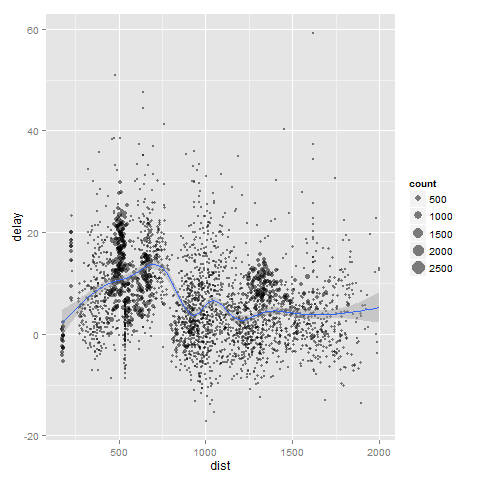

In [24]:
library("ggplot2")

by_tailnum <- group_by(flights, tailnum)
delay <- summarise(by_tailnum,
  count = n(),
  dist = mean(distance, na.rm = TRUE),
  delay = mean(arr_delay, na.rm = TRUE))
delay <- filter(delay, count > 20, dist < 2000)

# Interestingly, the average delay is only slightly related to the
# average distance flown by a plane.
ggplot(delay, aes(dist, delay)) +
  geom_point(aes(size = count), alpha = 1/2) +
  geom_smooth() +
  scale_size_area()

In [25]:
destinations <- group_by(flights, dest)
summarise(destinations,
  planes = n_distinct(tailnum),
  flights = n()
)

Source: local data frame [105 x 3]

   dest planes flights
1   ABQ    108     254
2   ACK     58     265
3   ALB    172     439
4   ANC      6       8
5   ATL   1180   17215
6   AUS    993    2439
7   AVL    159     275
8   BDL    186     443
9   BGR     46     375
10  BHM     45     297
..  ...    ...     ...

In [26]:
filter(
  summarise(
    select(
      group_by(flights, year, month, day),
      arr_delay, dep_delay
    ),
    arr = mean(arr_delay, na.rm = TRUE),
    dep = mean(dep_delay, na.rm = TRUE)
  ),
  arr > 30 | dep > 30
)

Source: local data frame [49 x 5]
Groups: year, month

   year month day      arr      dep
1  2013     1  16 34.24736 24.61287
2  2013     1  31 32.60285 28.65836
3  2013     2  11 36.29009 39.07360
4  2013     2  27 31.25249 37.76327
5  2013     3   8 85.86216 83.53692
6  2013     3  18 41.29189 30.11796
7  2013     4  10 38.41231 33.02368
8  2013     4  12 36.04814 34.83843
9  2013     4  18 36.02848 34.91536
10 2013     4  19 47.91170 46.12783
..  ...   ... ...      ...      ...

Similar to how ``dplyr`` provides optimized C++ versions of most of the `summarise` functions, pandas uses [cython](http://cython.org) optimized versions for most of the `agg` methods.

In [27]:
daily <- group_by(flights, year, month, day)
(per_day   <- summarise(daily, flights = n()))

Source: local data frame [365 x 4]
Groups: year, month

   year month day flights
1  2013     1   1     842
2  2013     1   2     943
3  2013     1   3     914
4  2013     1   4     915
5  2013     1   5     720
6  2013     1   6     832
7  2013     1   7     933
8  2013     1   8     899
9  2013     1   9     902
10 2013     1  10     932
..  ...   ... ...     ...

In [28]:
(per_month <- summarise(per_day, flights = sum(flights)))

Source: local data frame [12 x 3]
Groups: year

   year month flights
1  2013     1   27004
2  2013     2   24951
3  2013     3   28834
4  2013     4   28330
5  2013     5   28796
6  2013     6   28243
7  2013     7   29425
8  2013     8   29327
9  2013     9   27574
10 2013    10   28889
11 2013    11   27268
12 2013    12   28135

In [29]:
(per_year  <- summarise(per_month, flights = sum(flights)))

Source: local data frame [1 x 2]

  year flights
1 2013  336776

I'm not sure how ``dplyr`` is handling the other columns, like `year`, in the last example. With pandas, it's clear that we're grouping by them since they're included in the groupby. For the last example, we didn't group by anything, so they aren't included in the result.

# Chaining

Any follower of Hadley's [twitter account](https://twitter.com/hadleywickham/) will know how much R users *love* the ``%>%`` (pipe) operator. And for good reason!

In [30]:
flights %>%
  group_by(year, month, day) %>%
  select(arr_delay, dep_delay) %>%
  summarise(
    arr = mean(arr_delay, na.rm = TRUE),
    dep = mean(dep_delay, na.rm = TRUE)
  ) %>%
  filter(arr > 30 | dep > 30)

Source: local data frame [49 x 5]
Groups: year, month

   year month day      arr      dep
1  2013     1  16 34.24736 24.61287
2  2013     1  31 32.60285 28.65836
3  2013     2  11 36.29009 39.07360
4  2013     2  27 31.25249 37.76327
5  2013     3   8 85.86216 83.53692
6  2013     3  18 41.29189 30.11796
7  2013     4  10 38.41231 33.02368
8  2013     4  12 36.04814 34.83843
9  2013     4  18 36.02848 34.91536
10 2013     4  19 47.91170 46.12783
..  ...   ... ...      ...      ...

# Other Data Sources

Pandas has tons [IO tools](http://pandas.pydata.org/pandas-docs/version/0.15.0/io.html) to help you get data in and out, including SQL databases via [SQLAlchemy](http://www.sqlalchemy.org).

# Summary

I think pandas held up pretty well, considering this was a vignette written for dplyr. I found the degree of similarity more interesting than the differences. The most difficult task was renaming of columns within an operation; they had to be followed up with a call to ``rename`` *after* the operation, which isn't that burdensome honestly.

More and more it looks like we're moving towards future where being a language or package partisan just doesn't make sense. Not when you can load up a [Jupyter](http://jupyter.org) (formerly IPython) notebook to call up a library written in R, and hand those results off to python or Julia or whatever for followup, before going back to R to make a cool [shiny](http://shiny.rstudio.com) web app.

There will always be a place for your "utility belt" package like dplyr or pandas, but it wouldn't hurt to be familiar with both.

If you want to contribute to pandas, we're always looking for help at https://github.com/pydata/pandas/.
You can get ahold of me directly on [twitter](https://twitter.com/tomaugspurger).